In [1]:
import pandas as pd
import numpy as np

## Sector Accuracy

In [2]:
sector_acc = {"Communications":	0.9807692307692310,
              "Health":0.9738717339667460,
              "education":0.9736946202531650,
              "Agriculture"	: 0.9676375404530750,
              "Transport":	0.9561904761904760,
              "Water":0.9512987012987010,
              "Energy":0.9441860465116280,
              "Multisector":0.9431216931216930,
              "Industry":	0.9416342412451360,
              "Emergency":0.927536231884058,
              "Trade":0.9235880398671100,
              "Government":0.9041394335511980,
              "Other":0.8915492957746480,
              "Disaster":0.8859649122807020,
              "Unallocated":0.8805970149253730,
              "Environment":0.8558558558558560,
              "Administrative":	0.8297872340425530,
              "Business":0.8252427184466020,
              "pop_policies":0.8,
              "Banking":0.6727272727272730}

In [3]:
sector_acc_df = pd.DataFrame.from_dict(sector_acc, orient='index').reset_index(drop=False)
sector_acc_df.rename(columns = {'index':'sector', 0:'accuracy'}, inplace = True)

In [4]:
sector_acc_df.head(2)

,sector,accuracy
0,Communications,0.980769
1,Health,0.973872


## sector budget

In [6]:
## Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls drive/MyDrive/crs
counting = pd.read_csv("drive/MyDrive/crs/crs_final_df_kor.csv", header = 0)
#before eliminating 25 or less
print(counting.shape)
counting = counting[pd.notnull(counting['LongDescription'])]
counting = counting[counting['LongDescription'].str.len() > 25].reset_index(drop=True).copy()
#after eliminating 25 or less
counting.shape

CRS_2016_data_short.csv  crskor2011_2020.csv  glove.840B.300d.txt
crs_final_df_kor.csv	 data
(70269, 94)


(63977, 94)

In [9]:
## Aggregate by sector
data = counting.copy()
data = data[pd.notnull(data['LongDescription'])]
print("no null shape: "+ str(data.shape))
data['len'] = data['LongDescription'].apply(lambda s : len(s))
count_df = data[['PurposeCode','LongDescription']].groupby('PurposeCode').aggregate({'LongDescription':'count'}).reset_index().sort_values('LongDescription',ascending=False)
count_df.head()
#Eliminate codes with less than 100 observations
target_code = count_df[count_df['LongDescription']>100]['PurposeCode'].values
count_df['PurposeCode'].unique()

def condition_parser(x):
    if x in target_code:
        return x
    else:
        return "OTHER"
    
data['PurposeCode'] = data['PurposeCode'].apply(lambda x: condition_parser(x))  
data['PurposeCode'].unique()
data = data[data['PurposeCode']!='OTHER']
print("-----------------")
print("over 100 observation shape: "+ str(data.shape))
data.head(2)
data.columns

no null shape: (63977, 94)
-----------------
over 100 observation shape: (60540, 95)


Index(['Unnamed: 0', 'Year', 'DonorCode', 'DonorName', 'AgencyCode',
       'AgencyName', 'CrsID', 'ProjectNumber', 'InitialReport',
       'RecipientCode', 'RecipientName', 'RegionCode', 'RegionName',
       'IncomegroupCode', 'IncomegroupName', 'FlowCode', 'FlowName',
       'Bi_Multi', 'Category', 'Finance_t', 'Aid_t', 'USD_Commitment',
       'USD_Disbursement', 'USD_Received', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl', 'USD_Received_Defl', 'USD_Adjustment',
       'USD_Adjustment_Defl', 'USD_AmountUntied', 'USD_AmountPartialTied',
       'USD_AmountTied', 'USD_AmountUntied_Defl', 'USD_AmountPartialTied_Defl',
       'USD_Amounttied_Defl', 'USD_IRTC', 'USD_Expert_Commitment',
       'USD_Expert_Extended', 'USD_Export_Credit', 'CurrencyCode',
       'Commitment_National', 'Disbursement_National', 'GrantEquiv',
       'USD_GrantEquiv', 'ShortDescription', 'ProjectTitle', 'PurposeCode',
       'PurposeName', 'SectorCode', 'SectorName', 'ChannelCode', 'ChannelName',
       

## Aggregate by Sector

In [10]:
categories = {"education": [110,111,112,113,114],
              "Health" : [120,121,122,123],
              "pop_policies" : [130],
              "Water": [140],
              "Government" : [150,151,152],
              "Other" : [160],
              "Transport" : [210],
              "Communications" : [220],
              "Energy" : [230,231,232,233,234,235,236],
              "Banking" : [240],
              "Business" : [250],
              "Agriculture" : [310,311,312,313],
              "Industry" : [320,321,322,323],
              "Trade" : [330,331,332],
              "Environment": [410],
              "Multisector" : [430],
              "General" : [510],
              "Food": [520],
              "Commodity" : [530],
              "Action" : [600],
              "Emergency" : [720],
              "Reconstruction" : [730],
              "Disaster" : [740],
              "Administrative": [910],
              "Refugees" : [930],
              "Unallocated" : [998]}

nu_list = []
for i, number in data['PurposeCode'].iteritems():
  len = data['len'][i]
  disb = data['USD_Disbursement'][i]
  x = int(str(number)[0:3])
  for z in categories.items():
    if x in z[1]:
      xy = [z[0],len,disb]
      nu_list.append(xy)

df = pd.DataFrame(nu_list).reset_index(drop=False)
df

### Text length
xy = df.groupby(0, as_index=False)[1].mean()
xy.sort_values(1, ascending=False)
xy2 = df.groupby(0, as_index=False).agg({1:['mean','count']}).reset_index(drop =True)

### observation count
xy2.sort_values((1, 'count'),ascending=False)

### disbursement stats
usd_disb = df.groupby(0, as_index=False).agg({2:['mean','sum']}).reset_index(drop =True)
usd_disb
usd_disb.sort_values((2, 'sum'),ascending=False)

## Purpose code and frequency
counting['PurposeCode'].groupby([counting.Year]).agg('count')
pur_freq = counting[['PurposeCode','LongDescription']].groupby('PurposeCode').aggregate({'LongDescription':'count'}).reset_index().sort_values('LongDescription',ascending=False)
pur_freq.head()

,PurposeCode,LongDescription
85,22040.0,4791
46,15110.0,4635
13,11420.0,4387
4,11220.0,3356
5,11230.0,2949


## Budget table with rank

In [11]:
usd_disb_sorted = usd_disb.sort_values((2, 'sum'),ascending=False).copy()

In [12]:
usd_disb_sorted.columns = [''.join(str(col)) for col in usd_disb_sorted.columns.values]

In [13]:
usd_disb_sorted.head(2)

,"(0, '')","(2, 'mean')","(2, 'sum')"
15,Transport,1.139230,2353.648788
18,education,0.110289,2204.240245


In [14]:
usd_disb_sorted.rename(columns = {"(0, '')":'sector', "(2, 'mean')":"budget_mean","(2, 'sum')":'budget_sum'}, inplace = True)

In [15]:
usd_disb_sorted.reset_index(drop = True, inplace=True)

In [16]:
usd_disb_sorted.reset_index(drop = False, inplace = True)

In [17]:
usd_disb_sorted.head(2)

,index,sector,budget_mean,budget_sum
0,0,Transport,1.139230,2353.648788
1,1,education,0.110289,2204.240245


In [ ]:
usd_disb_sorted

,index,sector,budget_mean,budget_sum
0,0,Transport,1.139230,2353.648788
1,1,education,0.110289,2204.240245
2,2,Health,0.402821,1994.767533
3,3,Water,0.982933,1253.239448
4,4,Agriculture,0.191057,974.199855
5,5,Energy,1.107812,923.914836
6,6,Government,0.123946,898.113169
7,7,Multisector,0.192114,597.281184
8,8,Communications,0.096943,540.551832
9,9,Emergency,0.642978,522.097762


In [18]:
usd_disb_sorted = usd_disb_sorted.iloc[:,[0,1,3]]

In [19]:
usd_disb_sorted.rename(columns = {"index":'budget_rank'}, inplace = True)

In [20]:
usd_disb_sorted.head(2)

,budget_rank,sector,budget_sum
0,0,Transport,2353.648788
1,1,education,2204.240245


In [21]:
usd_disb_sorted.shape

(20, 3)

## Sector frequencies

In [22]:
sector_freq = xy2.sort_values((1, 'count'),ascending=False)

In [23]:
sector_freq.columns = ['_'.join(str(col)) for col in sector_freq.columns.values]

In [24]:
sector_freq.head(2)

,"(_0_,_ _'_'_)","(_1_,_ _'_m_e_a_n_'_)","(_1_,_ _'_c_o_u_n_t_'_)"
18,education,146.562369,20026
9,Government,162.983514,7279


In [26]:
sector_freq.shape

(20, 3)

In [27]:
sector_freq.reset_index(inplace=True)

In [28]:
sector_freq.iloc[: , [0,1,3]].head(2)

,index,"(_0_,_ _'_'_)","(_1_,_ _'_c_o_u_n_t_'_)"
0,18,education,20026
1,9,Government,7279


In [29]:
sector_freq_w_rank = sector_freq.iloc[: , [0,1,3]].copy()

In [30]:
sector_freq_w_rank.rename(columns={"index":"freq_rank"},inplace=True); sector_freq_w_rank.head(2)

,freq_rank,"(_0_,_ _'_'_)","(_1_,_ _'_c_o_u_n_t_'_)"
0,18,education,20026
1,9,Government,7279


In [37]:
sector_freq_w_rank.rename(columns = {"(_0_,_ _'_'_)":'sector', "(_1_,_ _'_c_o_u_n_t_'_)":'count'}, inplace = True)

In [38]:
sector_freq_w_rank

,freq_rank,sector,count
0,18,education,20026
1,9,Government,7279
2,4,Communications,5607
3,1,Agriculture,5110
4,10,Health,5011
5,12,Multisector,3113
6,13,Other,2719
7,11,Industry,2187
8,15,Transport,2149
9,17,Water,1307


# Piechart Sectors

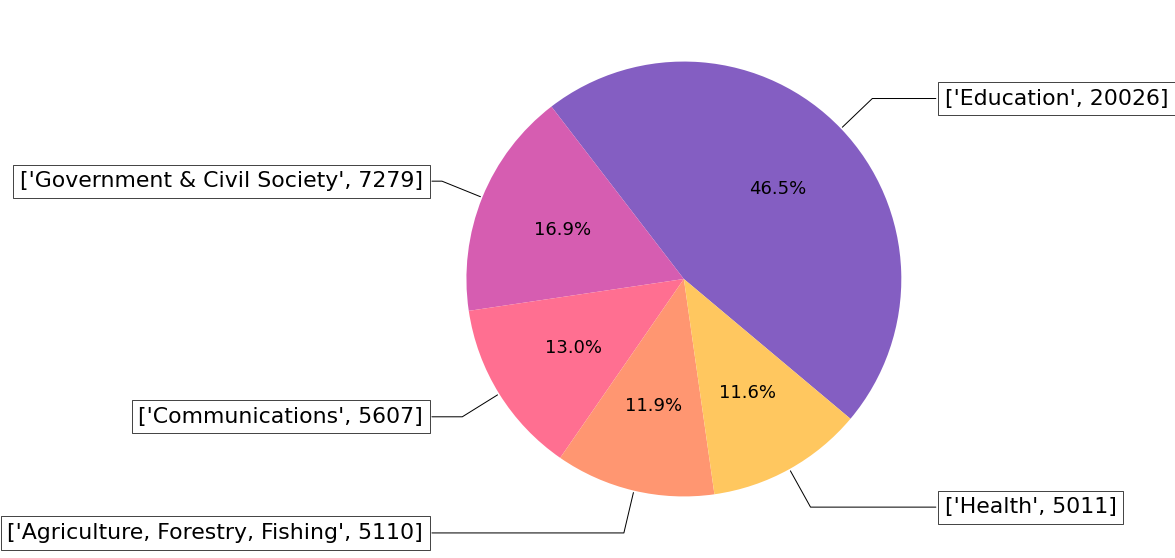

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
# instnames = sector_freq_w_rank["sector"].head(5)
instnames = ['Education','Government & Civil Society', 'Communications',
             'Agriculture, Forestry, Fishing','Health']
val = sector_freq_w_rank["count"].head(5)
tot_val = sector_freq_w_rank["count"]
cols = ['#845EC2', '#D65DB1', '#FF6F91', '#FF9671', '#FFC75F']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    # rel = int((absolute/np.sum(tot_val))*100)
    # return "{:.1f}%\n counts: {:d}".format(pct, absolute)
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(val, wedgeprops=dict(width=1), startangle=-40, autopct=lambda pct: func(pct, val),
                                  colors = cols, textprops={'fontsize': 18})
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([instnames[i],val[i]], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, size= 22)
#ax.set_title(namelist[z])
# name_ext = 'piecharts/'+"".join((namelist[z], "_piechart.png"))
# plt.savefig(name_ext)

## Merge freq with budget and accuracy table

In [ ]:
sector_acc_df
sector_freq_w_rank
usd_disb_sorted

In [ ]:
# from google.colab import files
# counting.to_csv('counting.csv') 
# files.download('counting.csv')